In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
iris_df = pd.read_csv('Iris.csv')
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
numeric_coloums=iris_df.select_dtypes(include=['number'])
summary_stats=numeric_coloums.agg(['mean', 'median', 'std', 'min', 'max'])
print (summary_stats)

                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
mean     75.500000       5.843333      3.054000       3.758667      1.198667
median   75.500000       5.800000      3.000000       4.350000      1.300000
std      43.445368       0.828066      0.433594       1.764420      0.763161
min       1.000000       4.300000      2.000000       1.000000      0.100000
max     150.000000       7.900000      4.400000       6.900000      2.500000


In [4]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
iris_df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
iris_df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
X = iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris_df['Species']

In [9]:
correlation_matrix = X.corr().abs()
print (correlation_matrix)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000      0.109369       0.871754      0.817954
SepalWidthCm        0.109369      1.000000       0.420516      0.356544
PetalLengthCm       0.871754      0.420516       1.000000      0.962757
PetalWidthCm        0.817954      0.356544       0.962757      1.000000


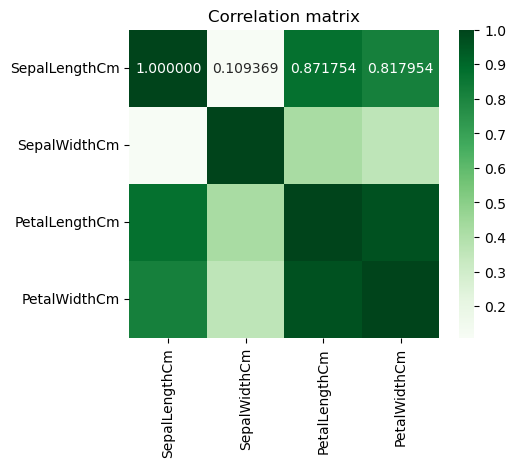

In [10]:
plt.figure(figsize=(5,4))
plt.title("Correlation matrix")
sns.heatmap(correlation_matrix,annot = True,fmt=".6f",cmap='Greens')
plt.show()

In [11]:
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [12]:
X_reduced = X.drop(columns=to_drop)
print("Remaining features: ", X_reduced.columns.tolist())

Remaining features:  ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm']


In [13]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_encoded, test_size=0.2, random_state=42)

In [15]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [18]:
new_sample = [[6.2, 3.4,5.4]]
new_sample_df = pd.DataFrame(new_sample, columns=X_reduced.columns)
predicted_class = model.predict(new_sample_df)
predicted_species = label_encoder.inverse_transform(predicted_class)
print("Predicted species: ",predicted_species)

Predicted species:  ['Iris-virginica']


In [19]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


In [20]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [21]:
print('Confusion Matrix:')
cm=confusion_matrix(y_test, y_pred)
print (cm)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


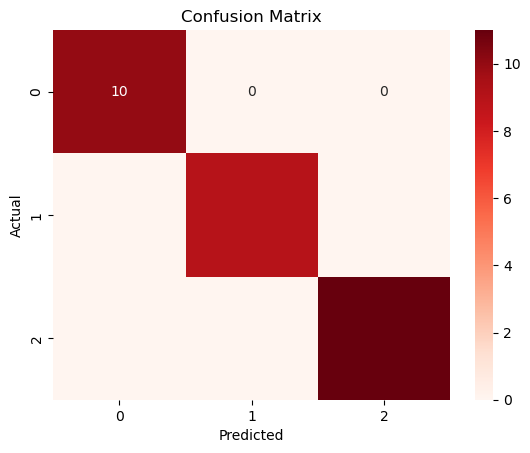

In [22]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()